# Sales Prediction
## ( Simple Linear Regression)

### Problem Statement

Build a model which predicts sales based on the money spent on different platforms for marketing.

### Data
Use the advertising dataset and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model. 

In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

## Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.DataFrame(pd.read_csv('SLR_Raw_Data.csv'))
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Data Inspection

In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isnull().sum()*100/len(df)

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Data Cleaning

In [7]:
# Checking Null values


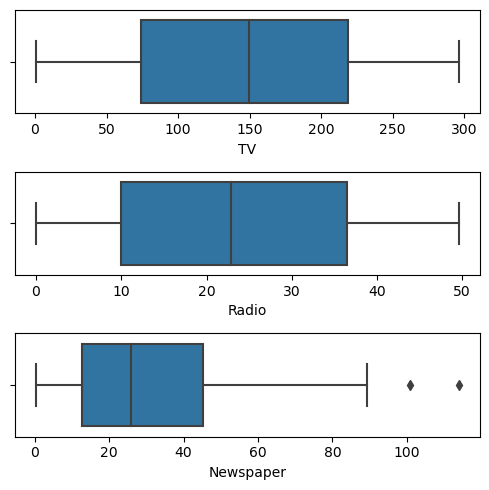

In [8]:
# Outlier Analysis
fig, ax = plt.subplots(3,1,figsize=(5,5))
plt1 = sns.boxplot(x=df['TV'],ax=ax[0])
plt2 = sns.boxplot(x=df['Radio'],ax=ax[1])
plt3 = sns.boxplot(x=df['Newspaper'],ax=ax[2])
plt.tight_layout()

## Exploratory Data Analysis

### Univariate Analysis

#### Sales (Target Variable)

<Axes: >

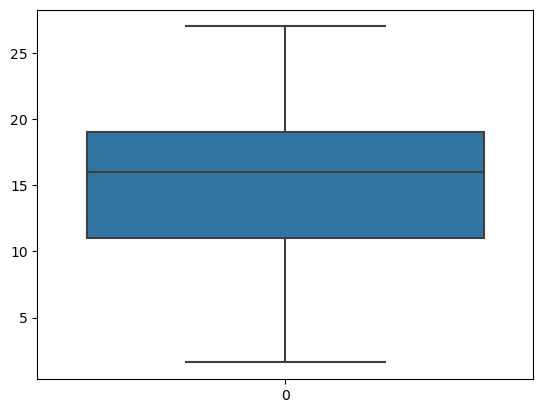

In [9]:
sns.boxplot(df.Sales)

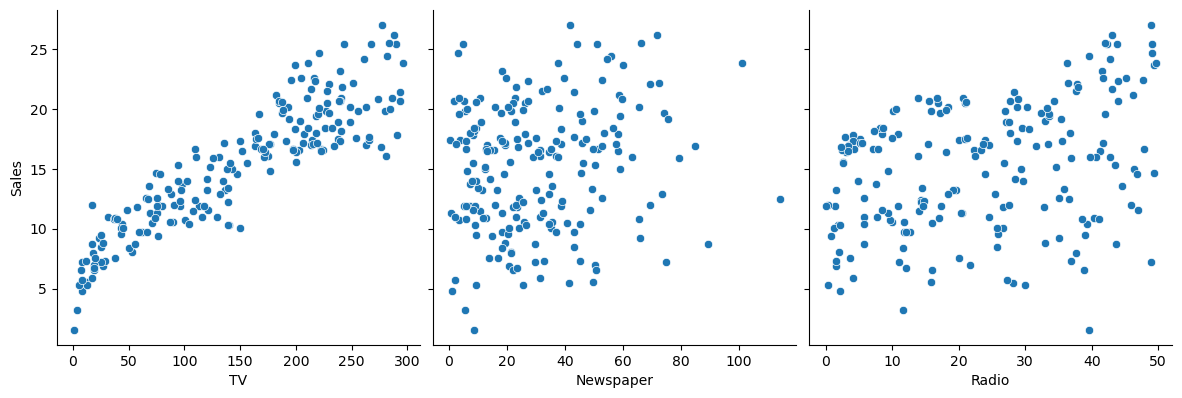

In [10]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(df, x_vars=['TV','Newspaper','Radio'], y_vars='Sales', height=4, aspect=1,kind='scatter')

<Axes: >

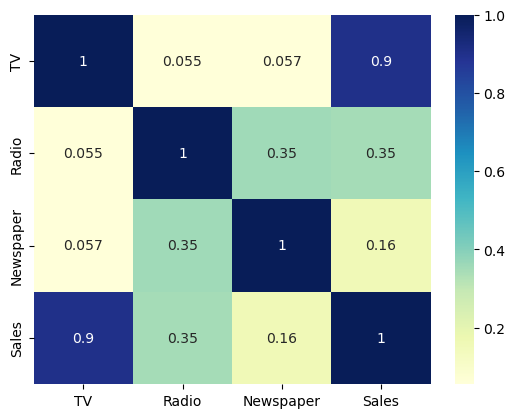

In [11]:
# Let's see the correlation between different variables.
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

## Model Building

### Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

In [12]:
X = df['TV']
y = df['Sales']

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [14]:
# Let's now take a look at the train dataset
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [15]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

#### Building a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

In [16]:
import statsmodels.api as sm


By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [17]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
X_train_sm
# Fit the resgression line using 'OLS'

lr = sm.OLS(y_train, X_train_sm).fit()


In [18]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [19]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 22 Aug 2023   Prob (F-statistic):           1.52e-52
Time:                        12:00:26   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####  Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for TV is 

##### 2. R - squared is

###### 3. F statistic 

---


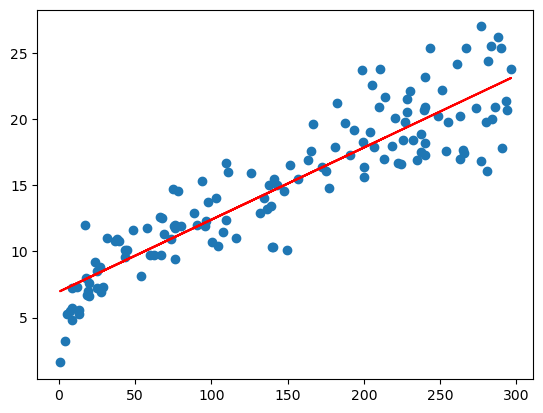

In [20]:
plt.scatter(X_train,y_train)
plt.plot(X_train, 6.9487+0.0545*X_train, 'r')
plt.show()

## Model Evaluation

### Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [21]:
y_train_pred = lr.predict(X_train_sm)

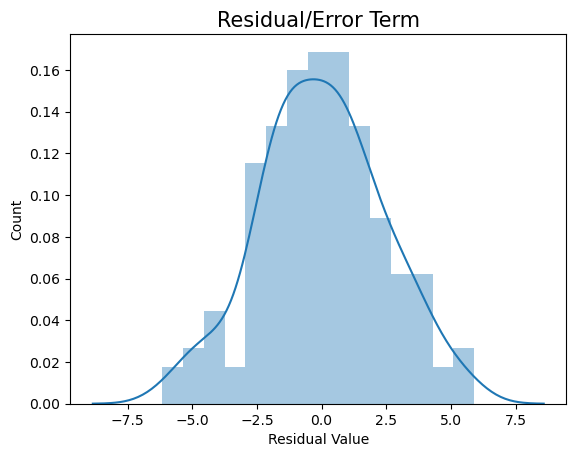

In [22]:
sns.distplot(y_train - y_train_pred, bins=15)
plt.title("Residual/Error Term", fontsize=15)
plt.xlabel("Residual Value")
plt.ylabel("Count")
plt.show()

The residuals are normally distribute around the mean

#### Looking for patterns in the residuals

<Axes: ylabel='Density'>

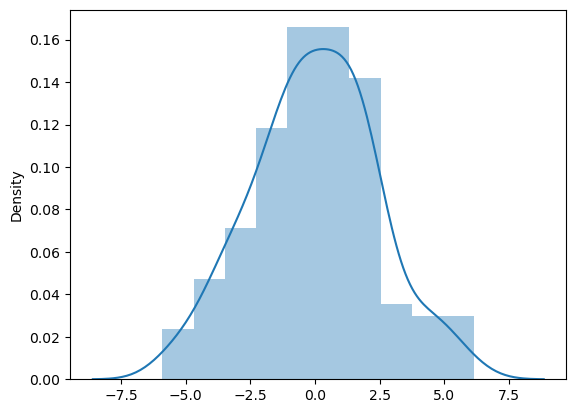

In [23]:
sns.distplot(y_train_pred-y_train)

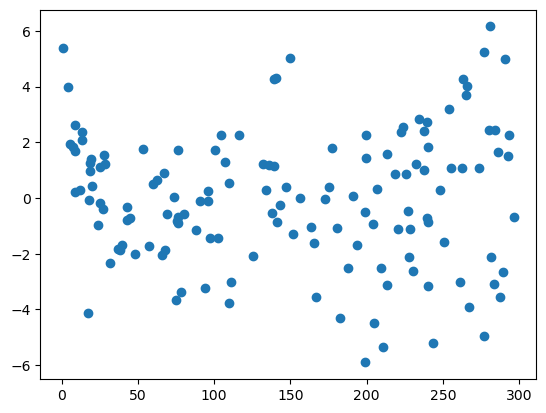

In [24]:
plt.scatter(X_train, y_train_pred-y_train)

### Predictions on the Test Set

In [25]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

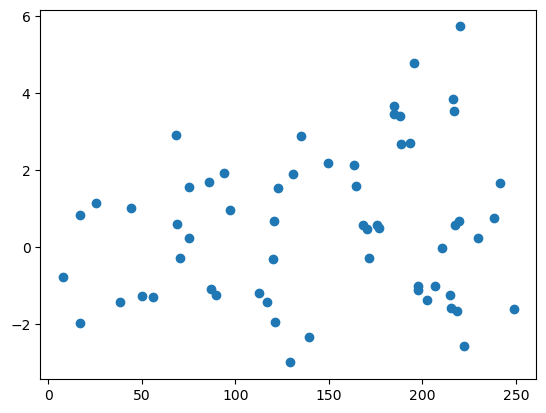

In [26]:
plt.scatter(X_test,y_test - y_test_pred)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

##### Looking at the RMSE

In [28]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test,y_test_pred))

2.019296008966233

###### Checking the R-squared on the test set

In [29]:
np.round(r2_score(y_test, y_test_pred),2)

0.79

##### Visualizing the fit on the test set

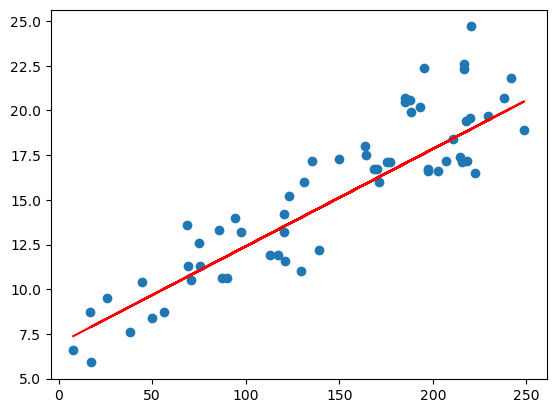

In [30]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9487+0.0545*X_test, 'r')
plt.show()

In [37]:
df_test = pd.concat([y_test,y_test_pred], axis=1)

In [39]:
df_test.to_excel("check results.xlsx")